In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import mne
import mne_connectivity
import nilearn
from nilearn import plotting
import tqdm
import networkx as nx

import utils.data

----

### Leitura das Séries BOLD de todas as ROI's

In [2]:
control_data = utils.data.batch_read('../data/Controls_columns')
prodomal_data = utils.data.batch_read('../data/Prodomals_columns')
parkinson_data = utils.data.batch_read('../data/PDs_columns')

--------

### Atlas AAL3

In [3]:
control_AAL3_data = utils.data.select_atlas_columns(control_data, 'AAL3')
prodomal_AAL3_data = utils.data.select_atlas_columns(prodomal_data, 'AAL3')
parkinson_AAL3_data = utils.data.select_atlas_columns(parkinson_data, 'AAL3')

control_AAL3_data[0].head()

,AAL3.cluster001,AAL3.cluster002,AAL3.cluster003,AAL3.cluster004,AAL3.cluster005,AAL3.cluster006,AAL3.cluster007,AAL3.cluster008,AAL3.cluster009,AAL3.cluster010,...,AAL3.cluster161,AAL3.cluster162,AAL3.cluster163,AAL3.cluster164,AAL3.cluster165,AAL3.cluster166,AAL3.cluster167,AAL3.cluster168,AAL3.cluster169,AAL3.cluster170
0,-0.060492,-0.064699,0.027009,0.006356,0.064636,0.025074,-0.072370,-0.023259,0.030439,0.141354,...,-0.128405,-0.212190,0.071778,-0.085851,-0.369906,-0.227215,0.218964,0.143408,0.114787,0.086331
1,0.004386,-0.048182,-0.005618,-0.001391,-0.028455,0.004416,0.008140,-0.016648,-0.002957,0.110977,...,0.121169,0.002904,0.144537,-0.160525,0.209921,0.348922,-0.037231,0.342327,0.182087,-0.142731
2,0.020226,-0.028979,-0.017380,0.002162,-0.063357,0.000866,0.041881,0.002447,-0.014558,0.048355,...,0.242692,0.082687,0.049029,-0.125446,0.396209,0.546062,-0.140805,0.501917,0.402791,-0.298033
3,-0.051301,-0.017008,0.021943,0.026391,0.032551,0.023242,-0.035161,0.014269,0.024234,-0.009537,...,0.064849,-0.150406,-0.138013,0.020100,-0.285842,-0.085880,0.057809,0.427078,0.668149,-0.168126
4,-0.096539,-0.009171,0.079801,0.052421,0.142671,0.025372,-0.122511,-0.020408,0.075939,-0.014011,...,-0.111373,-0.411528,0.032230,0.015906,-1.012333,-0.702678,0.194447,0.166741,0.575768,0.124174


In [4]:
control_correlation_matrix = utils.correlation.pearson_correlation(control_AAL3_data)
prodomal_correlation_matrix = utils.correlation.pearson_correlation(prodomal_AAL3_data)
parkinson_correlation_matrix = utils.correlation.pearson_correlation(parkinson_AAL3_data)


--------

### Atlas Harvard Oxford

In [5]:
control_HarvardOxford_data = utils.data.select_atlas_columns(control_data, 'atlas')
prodomal_HarvardOxford_data = utils.data.select_atlas_columns(prodomal_data, 'atlas')
parkinson_HarvardOxford_data = utils.data.select_atlas_columns(parkinson_data, 'atlas')

control_HarvardOxford_data[0].head()

,atlas.FP r (Frontal Pole Right),atlas.FP l (Frontal Pole Left),atlas.IC r (Insular Cortex Right),atlas.IC l (Insular Cortex Left),atlas.SFG r (Superior Frontal Gyrus Right),atlas.SFG l (Superior Frontal Gyrus Left),atlas.MidFG r (Middle Frontal Gyrus Right),atlas.MidFG l (Middle Frontal Gyrus Left),"atlas.IFG tri r (Inferior Frontal Gyrus, pars triangularis Right)","atlas.IFG tri l (Inferior Frontal Gyrus, pars triangularis Left)",...,atlas.Cereb10 l (Cerebelum 10 Left),atlas.Cereb10 r (Cerebelum 10 Right),atlas.Ver12 (Vermis 1 2),atlas.Ver3 (Vermis 3),atlas.Ver45 (Vermis 4 5),atlas.Ver6 (Vermis 6),atlas.Ver7 (Vermis 7),atlas.Ver8 (Vermis 8),atlas.Ver9 (Vermis 9),atlas.Ver10 (Vermis 10)
0,0.079897,0.077847,-0.045939,-0.041545,0.068797,0.025652,-0.017131,0.007786,0.234555,0.041747,...,-0.024353,0.207584,0.032311,-0.070127,0.010774,0.147576,-0.124722,0.005273,0.075773,0.469136
1,0.005260,-0.025679,0.002591,0.007830,-0.020343,-0.034317,-0.018127,0.002483,0.169562,-0.013082,...,0.023121,0.057089,-0.093890,0.023702,-0.014657,0.022591,0.013286,-0.066601,0.258746,0.026796
2,-0.021248,-0.060980,0.036583,0.027369,-0.038473,-0.060050,0.006048,0.004451,0.089554,-0.016830,...,0.087262,0.032869,-0.191265,0.037574,-0.038143,-0.027712,0.065746,-0.082538,0.310715,-0.393745
3,0.049624,0.049942,0.007416,-0.014063,0.081884,0.005021,0.051562,0.018803,0.064503,0.070064,...,0.097270,0.291137,-0.147473,-0.094300,-0.036595,0.092889,-0.072006,0.004329,0.158081,-0.290700
4,0.106161,0.170701,-0.057344,-0.039653,0.193318,0.102533,0.065627,0.036747,0.101599,0.159020,...,-0.026828,0.633415,-0.069606,-0.219440,-0.018856,0.220361,-0.223838,0.077115,0.104305,0.336286


In [6]:
control_correlation_matrix_HO = utils.correlation.pearson_correlation(control_HarvardOxford_data)
prodomal_correlation_matrix_HO = utils.correlation.pearson_correlation(prodomal_HarvardOxford_data)
parkinson_correlation_matrix_HO = utils.correlation.pearson_correlation(parkinson_HarvardOxford_data)

--------


### Atlas Shen 268

In [7]:
control_Shen_268_data = utils.data.select_atlas_columns(control_data, 'Shen_268')
parkinson_Shen_268_data = utils.data.select_atlas_columns(parkinson_data, 'Shen_268')
prodomal_Shen_268_data = utils.data.select_atlas_columns(prodomal_data, 'Shen_268')

control_Shen_268_data[0].head()

,Shen_268.cluster001,Shen_268.cluster002,Shen_268.cluster003,Shen_268.cluster004,Shen_268.cluster005,Shen_268.cluster006,Shen_268.cluster007,Shen_268.cluster008,Shen_268.cluster009,Shen_268.cluster010,...,Shen_268.cluster259,Shen_268.cluster260,Shen_268.cluster261,Shen_268.cluster262,Shen_268.cluster263,Shen_268.cluster264,Shen_268.cluster265,Shen_268.cluster266,Shen_268.cluster267,Shen_268.cluster268
0,0.009313,0.050518,-0.108646,0.096871,-0.000161,0.166471,0.097881,0.215399,-0.074893,0.013054,...,0.015130,0.016693,-0.015773,0.058529,0.016601,0.032254,-0.026864,-0.008357,0.030413,-0.096648
1,0.048990,-0.017856,-0.020717,-0.081458,-0.060279,0.030938,-0.026801,0.068102,-0.043145,-0.031910,...,-0.018073,-0.011051,0.002067,0.013713,0.041240,0.018199,0.012334,-0.040754,-0.072828,-0.165538
2,0.053008,-0.025655,0.042455,-0.084249,-0.060322,-0.036615,-0.057351,-0.006870,0.001286,-0.030671,...,-0.034468,-0.032728,0.017768,-0.022855,-0.009407,-0.024878,0.007082,-0.022855,-0.103381,-0.163677
3,-0.021886,0.071079,-0.011160,0.164904,0.045905,0.080827,0.089357,0.087666,0.012302,0.054409,...,-0.002170,-0.012200,0.013286,-0.002665,-0.117041,-0.058055,-0.057519,0.031788,-0.007214,-0.036127
4,-0.120558,0.157083,-0.138762,0.275828,0.137105,0.240161,0.194858,0.163979,-0.037386,0.136379,...,0.054903,0.057680,-0.003744,0.063354,-0.101520,-0.009579,-0.071558,-0.011000,0.034750,0.101827


In [8]:
control_correlation_matrix_Shen = utils.correlation.pearson_correlation(control_Shen_268_data)
prodomal_correlation_matrix_Shen = utils.correlation.pearson_correlation(prodomal_Shen_268_data)
parkinson_correlation_matrix_Shen = utils.correlation.pearson_correlation(parkinson_Shen_268_data)

-------

In [9]:

y = utils.data.concatenate_data([0 for _ in range(len(control_correlation_matrix))], [1 for _ in range(len(prodomal_correlation_matrix))], [2 for _ in range(len(parkinson_correlation_matrix))])
unique_classes = np.unique(y)

--------

# AAL3

## OMST Graph Generator

In [10]:
Control_omst_graphs = []
if os.path.exists('../data/Control_OMSTs'):
    Control_omst_graphs = utils.graph.load_graphs('../data/Control_OMSTs')
else:
    for i in tqdm.tqdm(range(len(control_correlation_matrix))):
        adj = control_correlation_matrix[i].copy()
        omst_builder = utils.graph.OMSTBuilder(adj)
        omst_builder.build(verbose=False)
        Control_omst_graphs.append(omst_builder.final_graph.to_undirected())
    utils.graph.save_graphs(Control_omst_graphs, '../data/Control_OMSTs')

100%|██████████| 66/66 [00:00<00:00, 83.13it/s] 

Loaded 66 graphs from ../data/Control_OMSTs


In [11]:
Prodomal_omst_graphs = []
if os.path.exists('../data/Prodomal_OMSTs'):
    Prodomal_omst_graphs = utils.graph.load_graphs('../data/Prodomal_OMSTs')
else:
    for i in tqdm.tqdm(range(len(prodomal_correlation_matrix))):
        adj = prodomal_correlation_matrix[i].copy()
        omst_builder = utils.graph.OMSTBuilder(adj)
        omst_builder.build(verbose=False)
        Prodomal_omst_graphs.append(omst_builder.final_graph.to_undirected())
    utils.graph.save_graphs(Prodomal_omst_graphs, '../data/Prodomal_OMSTs')


100%|██████████| 183/183 [00:01<00:00, 92.25it/s] 

Loaded 183 graphs from ../data/Prodomal_OMSTs


In [12]:
Parkinson_omst_graphs = []
if os.path.exists('../data/Parkinson_OMSTs'):
    Parkinson_omst_graphs = utils.graph.load_graphs('../data/Parkinson_OMSTs')
else:
    for i in tqdm.tqdm(range(len(parkinson_correlation_matrix))):
        adj = parkinson_correlation_matrix[i].copy()
        omst_builder = utils.graph.OMSTBuilder(adj)
        omst_builder.build(verbose=False)
        Parkinson_omst_graphs.append(omst_builder.final_graph.to_undirected())
    utils.graph.save_graphs(Parkinson_omst_graphs, '../data/Parkinson_OMSTs')


100%|██████████| 151/151 [00:01<00:00, 93.17it/s] 

Loaded 151 graphs from ../data/Parkinson_OMSTs


In [13]:
all_graphs = Control_omst_graphs + Prodomal_omst_graphs + Parkinson_omst_graphs

-----

### Mean Degree

In [14]:
mean_degree_scores = []
for graph in all_graphs:
    vk = dict(graph.degree()).values()
    vk = np.array(list(vk))
    md = np.mean(vk)
    mean_degree_scores.append(md)

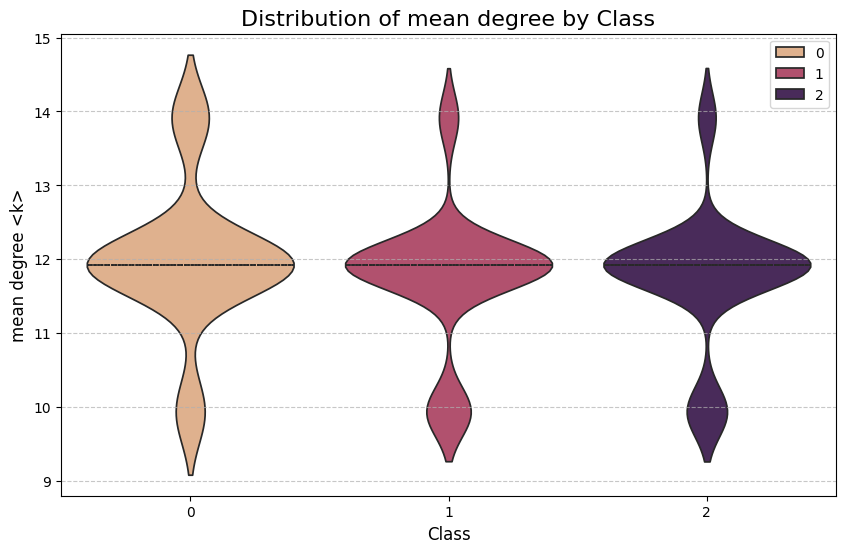

In [15]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=y, y=mean_degree_scores, hue=y, palette='flare', inner='quartile')

plt.title('Distribution of mean degree by Class', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('mean degree <k>', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

-----------

### Assortativity

In [16]:
assortativity_scores = []
for graph in all_graphs:
    assortativity = nx.degree_assortativity_coefficient(graph)
    assortativity_scores.append(assortativity)  

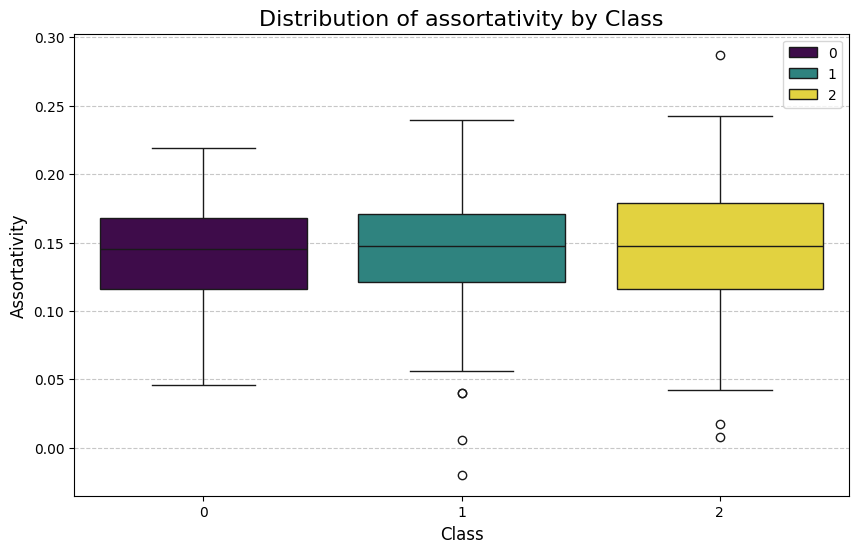

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=y, y=assortativity_scores, hue=y, palette='viridis')

plt.title('Distribution of assortativity by Class', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Assortativity', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

-----

### Density

In [18]:
density_scores = []
for graph in all_graphs:
    density = nx.density(graph)
    density_scores.append(density)

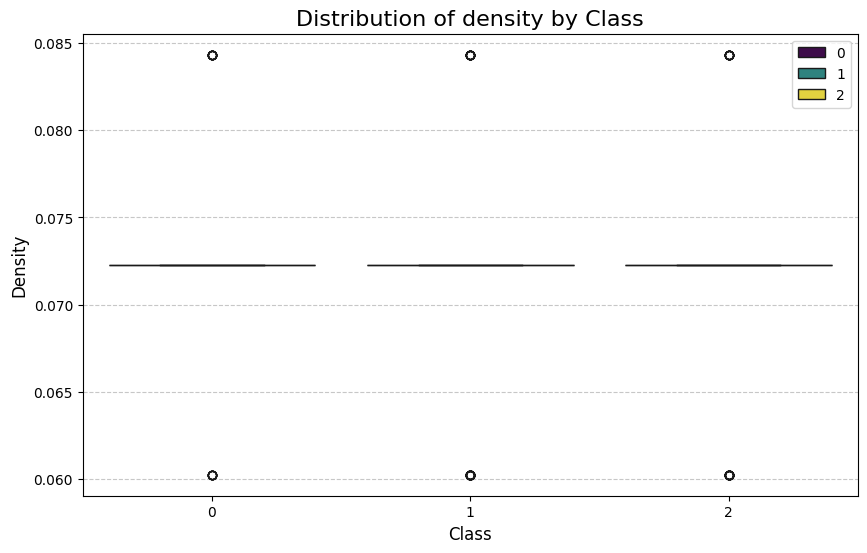

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=y, y=density_scores, hue=y, palette='viridis')

plt.title('Distribution of density by Class', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

-----

## FD 20%

In [ ]:
Control_FD20_graphs = []
for i in tqdm.tqdm(range(len(control_correlation_matrix))):
    adj = control_correlation_matrix[i].copy()
    Control_FD20_graphs.append(utils.graph.FD20Builder(adj).build().to_undirected())

    

100%|██████████| 66/66 [00:00<00:00, 74.18it/s]


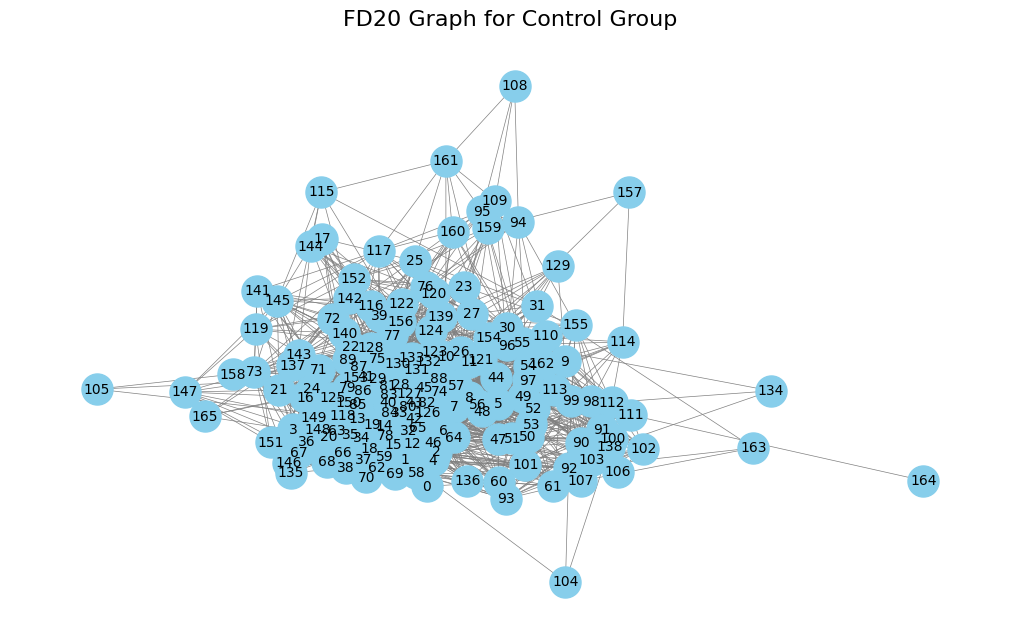

In [6]:

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(Control_FD20_graphs[0], seed=42)
nx.draw(Control_FD20_graphs[0], pos, with_labels=True, node_size=500, node_color='skyblue', edge_color='gray', font_size=10, font_color='black', width=0.5)
plt.title('FD20 Graph for Control Group', fontsize=16)
plt.axis('off')
plt.show()

In [20]:
def degree_distribution(graph):
    degree_list = np.array(list(dict(graph.degree()).values()))
    max_degree = np.max(degree_list)
    degree_values = np.arange(0, len(graph.nodes()) + 1)
    degree_frequency = np.zeros(len(graph.nodes()) + 1)

    for k in degree_list:
        degree_frequency[k] += 1

    return degree_values, degree_frequency

In [21]:
degree_values, degree_frequency_mean = degree_distribution(Control_FD20_graphs[0])
for i in tqdm.tqdm(range(1, len(Control_FD20_graphs))):
    _ , degree_frequency = degree_distribution(Control_FD20_graphs[i])
    degree_frequency_mean += degree_frequency
degree_frequency_mean /= len(Control_FD20_graphs)

100%|██████████| 65/65 [00:00<00:00, 7912.17it/s]


In [24]:
degree_values, degree_frequency = degree_distribution(Control_FD20_graphs[0])

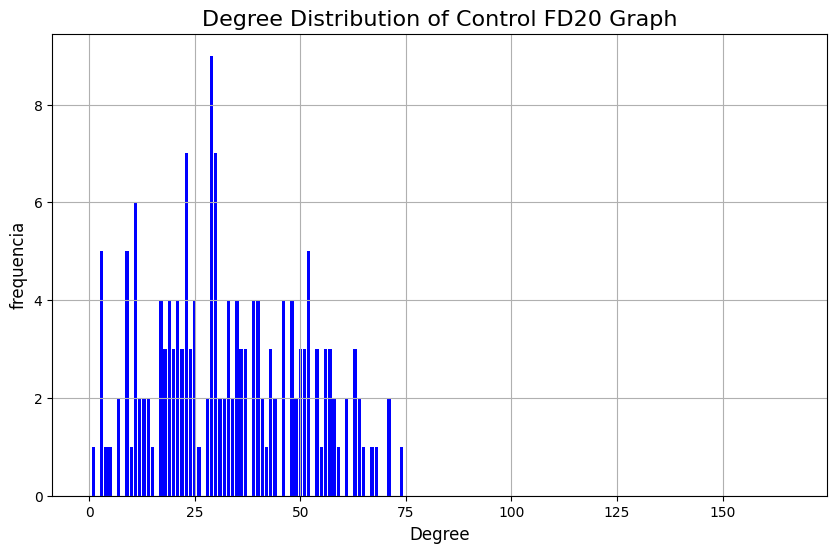

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(degree_values, degree_frequency, color='blue')
plt.title('Degree Distribution of Control FD20 Graph', fontsize=16)
plt.xlabel('Degree', fontsize=12)
plt.ylabel('frequencia', fontsize=12)
plt.grid(True)
plt.show()  

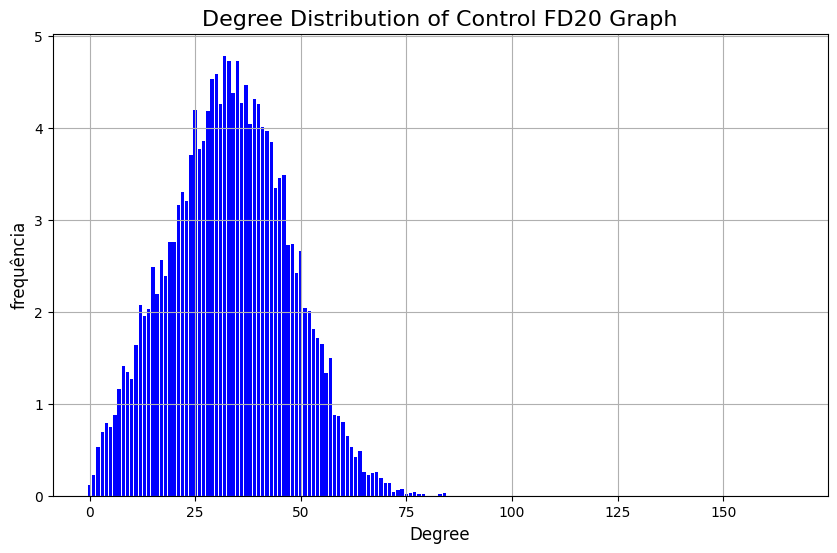

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(degree_values, degree_frequency_mean, color='blue')
plt.title('Degree Distribution of Control FD20 Graph', fontsize=16)
plt.xlabel('Degree', fontsize=12)
plt.ylabel('frequência', fontsize=12)
plt.grid(True)
plt.show()  